In [1]:
from newscatcher import Newscatcher
import pandas as pd
from datetime import datetime

In [2]:
all_headlines_csv = 'data/google-news-headlines.csv'
all_df_headlines = pd.read_csv(all_headlines_csv)

In [3]:
now = datetime.utcnow().strftime('%Y-%m-%d %H:%M')
now

'2020-02-28 10:05'

In [4]:
# get the current headlines
ns = Newscatcher('news.google.com')
df_latest = pd.DataFrame({'datetime': now, 'headline': ns.headlines})

In [5]:
df_latest

,datetime,headline
0,2020-02-28 10:05,Laura Ingraham debunks 'biggest lies' levied a...
1,2020-02-28 10:05,U.S. workers without protective gear assisted ...
2,2020-02-28 10:05,Live updates: Coronavirus pummels financial ma...
3,2020-02-28 10:05,Bloomberg says he will run 'right to the bitte...
4,2020-02-28 10:05,Trump blames stock market dip on Democrats at ...
5,2020-02-28 10:05,Bloomberg says he nearly eliminated stop-and-f...
6,2020-02-28 10:05,"Body, casket recovered after stolen hearse cra..."
7,2020-02-28 10:05,San Francisco police arrest suspect in filmed ...
8,2020-02-28 10:05,Bernie Sanders supporters react to report sayi...
9,2020-02-28 10:05,Education department says USC failed to protec...


In [6]:
# merge with the old one
all_df_headlines = all_df_headlines.append(df_latest, sort=True)


In [7]:
all_df_headlines.drop_duplicates(['headline'], inplace=True)

In [8]:
# save all headlines  to file
all_df_headlines.to_csv(all_headlines_csv, index=False)

In [9]:
# is_virus is 1 if there is reference to coronavirus
all_df_headlines['is_virus']= (
    all_df_headlines['headline']
    .apply(lambda v: 1 
           if ('coronavirus' in v.lower()) or ('covid-19' in v.lower())
           else 0)
)

In [10]:
# cumu sum of number of references to virus
all_df_headlines['total_virus'] = all_df_headlines['is_virus'].cumsum()

In [11]:
df_latest_samples = all_df_headlines[all_df_headlines['is_virus']==1].tail(5)
df_latest_samples[['headline']]

,headline
14,U.S. stock futures sink as coronavirus fears s...
16,The 10-year US Treasury yield falls to record ...
34,How will the coronavirus outbreak end? - Lives...
36,California patient with unknown origin of coro...
37,How deadly is the new coronavirus? Who's most ...


In [12]:
# plot chart number of headline mentioning coronavirus
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

png_file = 'images/google-news-headlines.png'
# convert to pd.datetime
all_df_headlines['datetime_idx'] = pd.to_datetime(all_df_headlines['datetime'], format="%Y-%m-%d %H:%M")
all_df_headlines.set_index('datetime_idx', inplace=True)


In [13]:
all_df_headlines

,datetime,headline,is_virus,total_virus
datetime_idx,,,,
2020-02-27 19:51:00,2020-02-27 19:51,The 31 wildest lines from Donald Trump's self-...,1,1
2020-02-27 21:14:00,2020-02-27 21:14,Coronavirus: Outbreak at 'decisive point' as W...,1,2
2020-02-27 21:14:00,2020-02-27 21:14,Shooter at Milwaukee Molson Coors had a long-r...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,Democratic Leaders Willing to Risk Party Damag...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,"Catherine Pugh, Former Baltimore Mayor, Senten...",0,2
...,...,...,...,...
2020-02-28 10:05:00,2020-02-28 10:05,"Sun Yang, Chinese Olympic Swimmer, Gets 8-Year...",0,118
2020-02-28 10:05:00,2020-02-28 10:05,"Astronomy student discovers 17 new planets, in...",0,118
2020-02-28 10:05:00,2020-02-28 10:05,How will the coronavirus outbreak end? - Lives...,1,119


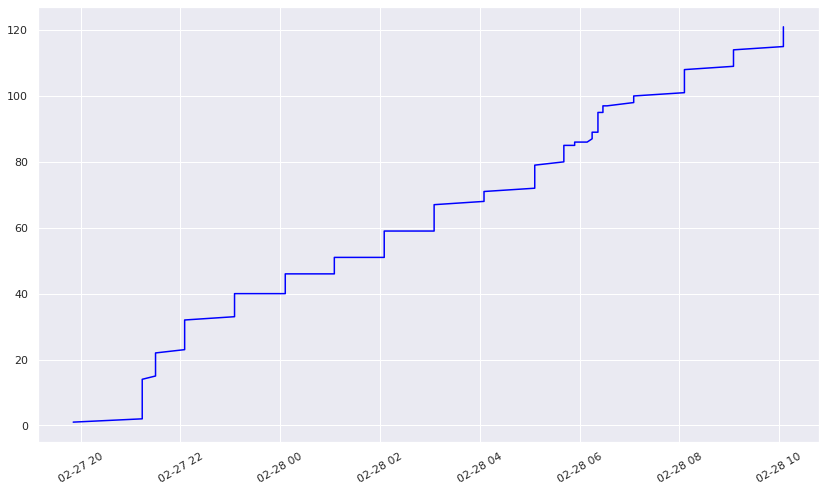

In [14]:
sns.set(rc={'figure.figsize':(14,8)})

fig, axs = plt.subplots(nrows=1)

sns.lineplot(x=all_df_headlines.index, y = 'total_virus', data=all_df_headlines, ax= axs, estimator=None, color='blue')

axs.set_xlabel('')
axs.set_ylabel('')
axs.tick_params(axis='x', labelrotation=30)

In [15]:
fig.savefig(png_file)
